# モジュールの読み込み

In [74]:
from larch import Interpreter
session = Interpreter()
import larch
from larch import io
from larch import xafs
from larch.io import read_ascii
from larch.xafs import pre_edge
from larch.xafs import mback

import matplotlib.pyplot as plt
import numpy as np

# ファイルの読み込み

In [75]:
#txtファイルの場合、labelがないため、第1列をenergy, 第2列(μt)をmuとする
dat = io.read_ascii("658_Pt-L1_PtO2_Si111_50ms_150611.txt", labels="energy mu")

# 後処理無しの生データ(これは使わない)

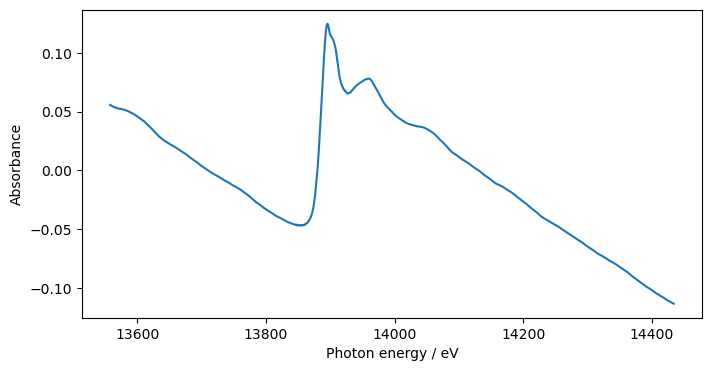

In [76]:
###ただの測定結果です。###
###フーリエ変換前のデータです。###

fig = plt.figure(figsize=(8, 4))
plt.plot(dat.energy, dat.mu)
#plt.plot(dat.e0, dat.mu[dat.energy == dat.e0], 'o', color='r')
plt.xlabel("Photon energy / eV")
plt.ylabel("Absorbance")
plt.show()

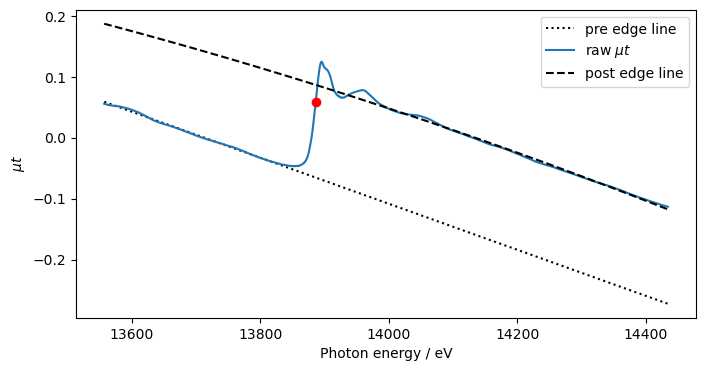

In [78]:
###バックグランド除去・規格化後でないと実行できません###

fig = plt.figure(figsize=(8, 4))
plt.plot(dat.energy, dat.pre_edge, linestyle=":", color="k", label="pre edge line")
plt.plot(dat.energy, dat.mu, label="raw $\mu t$")
plt.plot(dat.e0, dat.mu[dat.energy == dat.e0], 'o', color='r')
plt.plot(dat.energy, dat.post_edge,linestyle="--", color="k", label="post edge line")
plt.xlabel("Photon energy / eV"); plt.ylabel("$\mu t$"); plt.legend()
plt.show()

# バックグラウンド除去・規格化

In [77]:
###以下のコードで、バッググラウンド除去や規格化を自動的に行える###
larch.xafs.pre_edge(dat, _larch=session)

In [79]:
##pre_edgeモジュールでできること##

#e0 → 吸収端(μtの一次微分の最初のピーク)

#edge_step → Δμ(吸収端のジャンプの値) 規格化前のものなので使わない

#dmude → dμ/dE (array)

#norm → normalized mu(E) (array) μtを規格化した値

#flat → flattened, normalized mu(E) (array)
#吸収端より高エネルギー側について，規格化されたスペクトルからプレエッジの線とポストエッジの線の差分を差し引いた値
#normを使うか、flatを使うかはどちらでも良い。
#しかし、Athenaはflatを推奨している

#edge → ○○吸収端 (○には、L1や Kなど)

#pre_edge → pre-edge curve (array) 吸収端前の領域

#post_edge → post-edge curve (array) 吸収端後の領域

In [80]:
print('e0(吸収端)は', dat.e0)
print('edge_stepは', dat.edge_step)
print('edgeの種類は', dat.edge)

e0(吸収端)は 13886.318471
edge_stepは 0.15216651341525456
edgeの種類は L1


In [81]:
print('dμ/dEは')
print(dat.dmude)

dμ/dEは
[ 5.00308801e-04  8.58053723e-04  1.54297726e-03  1.66735081e-03
  1.20767566e-03  8.03790959e-04  5.09151241e-04  1.18278008e-04
 -1.07422775e-04 -5.80140107e-04 -1.07077560e-03 -1.17039170e-03
 -1.29634542e-03 -8.27017918e-04 -6.55889408e-05  2.13056442e-04
  3.43499315e-04  2.82218546e-04  1.08377020e-04  1.70410750e-04
 -1.30206363e-04 -2.38558413e-04 -5.13410766e-05 -2.66529320e-04
 -1.49208696e-04  5.45857071e-05  7.76740997e-05  3.70497444e-04
  4.28062595e-04  3.19273528e-04  4.32126312e-04  3.30196568e-04
  3.41095166e-04  4.49898808e-04  7.15166674e-05 -1.40059255e-04
 -3.29753255e-04 -6.64084766e-04 -3.62289472e-04 -1.52979188e-04
 -1.12059030e-04  1.55883037e-04  1.44353211e-04  3.25612134e-04
  6.37468660e-04  5.38351227e-04  7.85057457e-04  1.18780552e-03
  1.23147534e-03  1.29465240e-03  2.63620392e-03  1.56127303e-03
 -7.66884003e-04  3.52733693e-03  7.03670833e-03 -1.34442929e-03
 -2.62403399e-03  5.52161455e-03  2.27436110e-03  1.96497920e-03
  3.13262386e-03  

In [82]:
print('規格化μtは')
print(dat.norm)

規格化μtは
[-2.08936723e-02 -1.78252579e-02 -1.08237632e-02  6.88036995e-05
  8.96146836e-03  1.41010396e-02  1.85111391e-02  2.01795142e-02
  1.98890115e-02  1.88916304e-02  1.30150874e-02  6.35591052e-03
 -9.72067229e-04 -8.71730955e-03 -1.08563265e-02 -9.52381628e-03
 -8.36200616e-03 -5.44397737e-03 -4.94412959e-03 -4.15553662e-03
 -2.87793095e-03 -5.68006484e-03 -5.67395721e-03 -6.31092993e-03
 -8.79343343e-03 -8.06544723e-03 -8.11885251e-03 -7.12177551e-03
 -3.65064147e-03 -1.98033622e-03  2.02711605e-04  3.33640029e-03
  4.13558584e-03  7.38209526e-03  9.61181532e-03  8.23335730e-03
  7.91566176e-03  4.18264820e-03  4.63321829e-07 -2.49492885e-04
 -1.87090248e-03 -1.61409935e-03  8.96166559e-05  1.09779113e-04
  3.95073315e-03  8.06737179e-03  1.05287569e-02  1.77287599e-02
  2.35047826e-02  2.53999806e-02  2.62499558e-02  2.79171019e-02
  2.75053942e-02  2.74288829e-02  2.97510944e-02  3.19090495e-02
  2.88950761e-02  3.02382090e-02  3.25036334e-02  3.18008770e-02
  3.39196623e-02  

In [83]:
print('規格化・畳み込みμtは')
print(dat.flat)

規格化・畳み込みμtは
[-2.08936723e-02 -1.78252579e-02 -1.08237632e-02  6.88036995e-05
  8.96146836e-03  1.41010396e-02  1.85111391e-02  2.01795142e-02
  1.98890115e-02  1.88916304e-02  1.30150874e-02  6.35591052e-03
 -9.72067229e-04 -8.71730955e-03 -1.08563265e-02 -9.52381628e-03
 -8.36200616e-03 -5.44397737e-03 -4.94412959e-03 -4.15553662e-03
 -2.87793095e-03 -5.68006484e-03 -5.67395721e-03 -6.31092993e-03
 -8.79343343e-03 -8.06544723e-03 -8.11885251e-03 -7.12177551e-03
 -3.65064147e-03 -1.98033622e-03  2.02711605e-04  3.33640029e-03
  4.13558584e-03  7.38209526e-03  9.61181532e-03  8.23335730e-03
  7.91566176e-03  4.18264820e-03  4.63321829e-07 -2.49492885e-04
 -1.87090248e-03 -1.61409935e-03  8.96166559e-05  1.09779113e-04
  3.95073315e-03  8.06737179e-03  1.05287569e-02  1.77287599e-02
  2.35047826e-02  2.53999806e-02  2.62499558e-02  2.79171019e-02
  2.75053942e-02  2.74288829e-02  2.97510944e-02  3.19090495e-02
  2.88950761e-02  3.02382090e-02  3.25036334e-02  3.18008770e-02
  3.39196623e

In [84]:
print('吸収端前の規格化前μtは')
print(dat.pre_edge)

吸収端前の規格化前μtは
[ 0.05891932  0.05660041  0.05448201  0.05221553  0.04999536  0.04782229
  0.04550322  0.04330835  0.04109856  0.03877533  0.03661854  0.03434884
  0.03209992  0.02995248  0.02758097  0.02530321  0.02315442  0.02081239
  0.01857533  0.01631733  0.01399092  0.01189032  0.00955939  0.00724431
  0.00513407  0.00279829  0.00046142 -0.0017953  -0.00409849 -0.00633666
 -0.00866185 -0.01098869 -0.0131653  -0.01547331 -0.0177676  -0.01997384
 -0.0223465  -0.02461846 -0.02685307 -0.02924404 -0.03147831 -0.03384839
 -0.03623364 -0.0383637  -0.04071717 -0.04308358 -0.04533712 -0.04773672
 -0.04946764 -0.05009203 -0.05026936 -0.05045305 -0.0505734  -0.05069376
 -0.05081412 -0.05093449 -0.05105486 -0.05117524 -0.05130196 -0.05143503
 -0.05157444 -0.05172653 -0.05188496 -0.05204341 -0.05220187 -0.05227793
 -0.05235399 -0.05249979 -0.05265193 -0.05279141 -0.05293089 -0.05307038
 -0.05322255 -0.05337474 -0.05353328 -0.05360938 -0.05368548 -0.0538377
 -0.05398992 -0.05412947 -0.05426902 -0

In [85]:
print('吸収端後の規格化前μtは')
print(dat.post_edge)

吸収端後の規格化前μtは
[ 0.18713762  0.18541825  0.18384247  0.18215115  0.18048901  0.17885698
  0.17710965  0.17545056  0.17377491  0.17200756  0.1703616   0.16862405
  0.1668969   0.16524259  0.16340986  0.16164386  0.15997272  0.1581456
  0.15639484  0.1546222   0.15279009  0.15113077  0.14928394  0.14744385
  0.14576152  0.14389378  0.14201925  0.14020341  0.13834451  0.13653259
  0.13464449  0.13274919  0.13097096  0.12907979  0.12719414  0.1253755
  0.1234138   0.12152965  0.11967103  0.11767639  0.11580688  0.11381784
  0.11180993  0.11001163  0.10801903  0.10600942  0.10409004  0.10204023
  0.10055776  0.1000222   0.09987001  0.09971234  0.09960901  0.09950567
  0.0994023   0.09929891  0.09919551  0.09909208  0.09898318  0.09886882
  0.09874899  0.09861822  0.09848198  0.0983457   0.09820938  0.09814394
  0.09807849  0.09795302  0.09782206  0.09770198  0.09758188  0.09746175
  0.09733066  0.09719955  0.09706293  0.09699735  0.09693175  0.09680054
  0.09666929  0.09654895  0.09642858  0.

In [95]:
###energyとflatのデータ数が同じかどうか確かめる###

print(len(dat.energy))
print(len(dat.flat))

468
468


In [87]:
####energyと規格後flatデータを新たに作る###

combined_list = list(zip(dat.energy, dat.flat))
combined_list

[(13557.383751, -0.020893672312262874),
 (13563.516792, -0.017825257923409027),
 (13569.119507, -0.010823763183672789),
 (13575.113892, 6.880369953028897e-05),
 (13580.985775, 0.008961468360303718),
 (13586.733101, 0.014101039561640119),
 (13592.866564, 0.01851113914854927),
 (13598.671547, 0.02017951416134191),
 (13604.516002, 0.019889011466389234),
 (13610.660474, 0.018891630354319778),
 (13616.364733, 0.013015087398507081),
 (13622.367614, 0.006355910520240025),
 (13628.315565, -0.0009720672292544009),
 (13633.995086, -0.008717309546871615),
 (13640.267252, -0.010856326532155203),
 (13646.291469, -0.009523816283825414),
 (13651.974574, -0.008362006161727128),
 (13658.168753, -0.005443977365197901),
 (13664.085318, -0.004944129594851844),
 (13670.057258, -0.004155536615224602),
 (13676.210132, -0.0028779309501103362),
 (13681.765812, -0.0056800648445609545),
 (13687.930642, -0.005673957212643199),
 (13694.053538, -0.006310929926501136),
 (13699.634706, -0.008793433428648531),
 (13705

In [88]:
combined_list = list(zip(dat.energy, dat.flat))

# テキストファイルにデータを書き込む
with open('output.txt', 'w') as file:
    for item in combined_list:
        file.write(f'{item[0]}\t{item[1]}\n')


In [89]:
###フーリエ変換後の生データを再度読み込む###
###新たにファイルを作ったほうが、edge_step等も使える。###

data = io.read_ascii("output.txt", labels="energy mu")

In [90]:
larch.xafs.pre_edge(data, _larch=session)

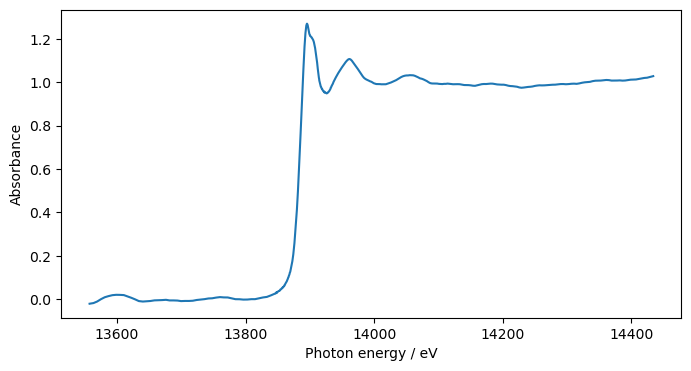

In [91]:
###規格化(フーリエ変換)後のデータ → これを使う###

fig = plt.figure(figsize=(8, 4))
plt.plot(data.energy, data.mu)
plt.xlabel("Photon energy / eV")
plt.ylabel("Absorbance")
plt.show()

In [92]:
data.mu

array([-2.08936723e-02, -1.78252579e-02, -1.08237632e-02,  6.88036995e-05,
        8.96146836e-03,  1.41010396e-02,  1.85111391e-02,  2.01795142e-02,
        1.98890115e-02,  1.88916304e-02,  1.30150874e-02,  6.35591052e-03,
       -9.72067229e-04, -8.71730955e-03, -1.08563265e-02, -9.52381628e-03,
       -8.36200616e-03, -5.44397737e-03, -4.94412959e-03, -4.15553662e-03,
       -2.87793095e-03, -5.68006484e-03, -5.67395721e-03, -6.31092993e-03,
       -8.79343343e-03, -8.06544723e-03, -8.11885251e-03, -7.12177551e-03,
       -3.65064147e-03, -1.98033622e-03,  2.02711605e-04,  3.33640029e-03,
        4.13558584e-03,  7.38209526e-03,  9.61181532e-03,  8.23335730e-03,
        7.91566176e-03,  4.18264820e-03,  4.63321829e-07, -2.49492885e-04,
       -1.87090248e-03, -1.61409935e-03,  8.96166559e-05,  1.09779113e-04,
        3.95073315e-03,  8.06737179e-03,  1.05287569e-02,  1.77287599e-02,
        2.35047826e-02,  2.53999806e-02,  2.62499558e-02,  2.79171019e-02,
        2.75053942e-02,  

In [93]:
data.dmude

array([ 5.00308801e-04,  8.58053723e-04,  1.54297726e-03,  1.66735081e-03,
        1.20767566e-03,  8.03790959e-04,  5.09151241e-04,  1.18278008e-04,
       -1.07422775e-04, -5.80140107e-04, -1.07077560e-03, -1.17039170e-03,
       -1.29634542e-03, -8.27017918e-04, -6.55889408e-05,  2.13056442e-04,
        3.43499315e-04,  2.82218546e-04,  1.08377020e-04,  1.70410750e-04,
       -1.30206363e-04, -2.38558413e-04, -5.13410766e-05, -2.66529320e-04,
       -1.49208696e-04,  5.45857071e-05,  7.76740997e-05,  3.70497444e-04,
        4.28062595e-04,  3.19273528e-04,  4.32126312e-04,  3.30196568e-04,
        3.41095166e-04,  4.49898808e-04,  7.15166674e-05, -1.40059255e-04,
       -3.29753255e-04, -6.64084766e-04, -3.62289472e-04, -1.52979188e-04,
       -1.12059030e-04,  1.55883037e-04,  1.44353211e-04,  3.25612134e-04,
        6.37468660e-04,  5.38351227e-04,  7.85057457e-04,  1.18780552e-03,
        1.23147534e-03,  1.29465240e-03,  2.63620392e-03,  1.56127303e-03,
       -7.66884003e-04,  

In [94]:
###dμ/dEが最も大きい部分＝変曲点の1つ前のデータ###
max(data.dmude)

0.07551887603300904

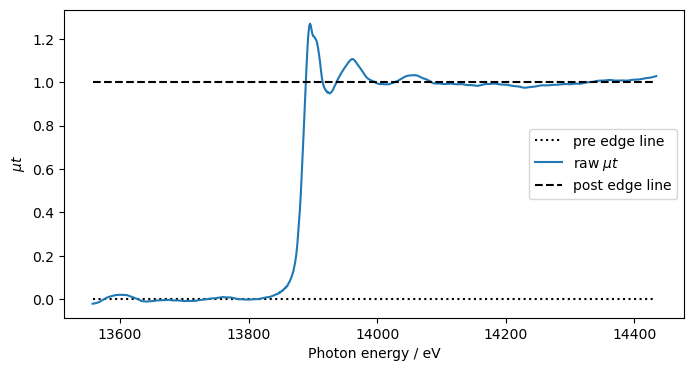

In [96]:
fig = plt.figure(figsize=(8, 4))
plt.plot(data.energy, data.pre_edge, linestyle=":", color="k", label="pre edge line")
plt.plot(data.energy, data.mu, label="raw $\mu t$")
plt.plot(data.energy, data.post_edge,linestyle="--", color="k", label="post edge line")
plt.xlabel("Photon energy / eV"); plt.ylabel("$\mu t$"); plt.legend()
plt.show()

In [97]:
print('e0(吸収端)は', dat.e0)
print('edge_stepは', dat.edge_step)
print('edgeの種類は', dat.edge)
print('')
print('e0(吸収端)は', data.e0)
print('edge_stepは', data.edge_step)
print('edgeの種類は', data.edge)

#edge_stepの値だけ変わっています。

e0(吸収端)は 13886.318471
edge_stepは 0.15216651341525456
edgeの種類は L1

e0(吸収端)は 13886.318471
edge_stepは 0.9999999999999928
edgeの種類は L1


[matplotlib.legend] WARNING : No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


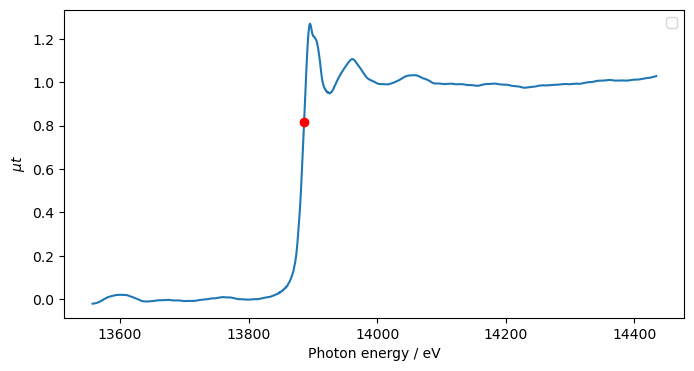

In [98]:
###赤い点は、e0=ピークの変曲点=吸収端を示している###

fig = plt.figure(figsize=(8, 4))
#plt.plot(data.energy, data.pre_edge, linestyle=":", color="k", label="pre edge line")
plt.plot(data.energy, data.mu)
plt.plot(data.e0, data.mu[data.energy == data.e0], 'o', color='r')
#plt.plot(data.energy, data.post_edge,linestyle="--", color="k", label="post edge line")
plt.xlabel("Photon energy / eV"); plt.ylabel("$\mu t$"); plt.legend()
plt.show()

In [99]:
print(data.e0)
print(data.mu[data.energy == data.e0])

13886.318471
[0.81779676]


In [100]:
import numpy as np

# データ点の座標を表すndarray
x = data.energy
y = data.mu

# 変曲点の座標を表すndarray
e0 = np.array([data.e0, np.interp(data.e0, x, y)])

# e0から最も近い極大値・極小値の座標を求める
distances = np.sqrt((x - e0[0]) ** 2 + (y - e0[1]) ** 2)
maxima = (y[1:-1] > y[:-2]) & (y[1:-1] > y[2:])
minima = (y[1:-1] < y[:-2]) & (y[1:-1] < y[2:])
extrema = np.where(maxima | minima)[0] + 1
nearest_extrema = extrema[np.argsort(distances[extrema])[:2]]
nearest_extrema_coords = np.array([[x[i], y[i]] for i in nearest_extrema])

if nearest_extrema_coords[0, 0] > nearest_extrema_coords[1, 0]:
    nearest_extrema_coords1 = np.array([[nearest_extrema_coords[0], nearest_extrema_coords[0]]])
    nearest_extrema_coords2 = np.array([[nearest_extrema_coords[1], nearest_extrema_coords[1]]])                                    
    for coord in nearest_extrema_coords1:
        print(f"最も近い極大値の座標は({coord[0, 0]}, {coord[0, 1]})です。")
    for coord in nearest_extrema_coords2:
        print(f"最も近い極小値の座標は({coord[1, 0]}, {coord[1, 1]})です。")
else:
    nearest_extrema_coords1 = np.array([[nearest_extrema_coords[0], nearest_extrema_coords[0]]])
    nearest_extrema_coords2 = np.array([[nearest_extrema_coords[1], nearest_extrema_coords[1]]])                                    
    for coord in nearest_extrema_coords1:
        print(f"最も近い極小値の座標は({coord[0, 0]}, {coord[0, 1]})です。")
    for coord in nearest_extrema_coords2:
        print(f"最も近い極大値の座標は({coord[1, 0]}, {coord[1, 1]})です。")


最も近い極大値の座標は(13895.625787, 1.2698594576435789)です。
最も近い極小値の座標は(13860.60353, 0.06283532974707712)です。


[matplotlib.legend] WARNING : No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


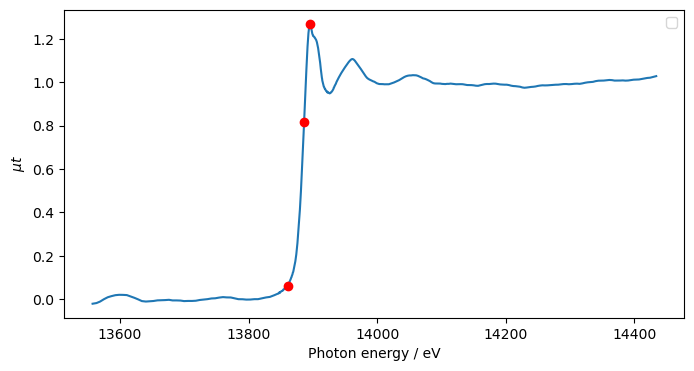

In [101]:
###ピークの極小値・変曲点・極大値を示した図###

fig = plt.figure(figsize=(8, 4))
#plt.plot(data.energy, data.pre_edge, linestyle=":", color="k", label="pre edge line")
plt.plot(data.energy, data.mu)
plt.plot(data.e0, data.mu[data.energy == data.e0], 'o', color='r')
#plt.plot(data.energy, data.post_edge,linestyle="--", color="k", label="post edge line")
plt.plot(nearest_extrema_coords[0, 0], nearest_extrema_coords[0, 1], 'o', color='r')
plt.plot(nearest_extrema_coords[1, 0], nearest_extrema_coords[1, 1], 'o', color='r')
plt.xlabel("Photon energy / eV"); plt.ylabel("$\mu t$"); plt.legend()
plt.show()

In [102]:
peak_width = nearest_extrema_coords[0, 0] - nearest_extrema_coords[1, 0]
peak_height = nearest_extrema_coords[0, 1] - nearest_extrema_coords[1, 1]
peak_slope = peak_height / peak_width

if peak_width < 0:
    peak_width = abs(peak_width)
    
if peak_height < 0:
    peak_height = abs(peak_height)
    
if peak_slope < 0:
    peak_slope = abs(peak_slope)
    
print(peak_width)  #peakの幅
print(peak_height) #peakの高さ
print(peak_slope)  #peakの傾き

35.022257000000536
1.2070241278965017
0.03446448719442848


ピークの数: 34
ピークの位置: [13598.671547, 13676.210132, 13687.930642, 13705.812352, 13760.204905, 13846.651219, 13847.924531, 13848.896429, 13851.678828, 13854.378499, 13857.817507, 13860.301376, 13895.625787, 13919.118619, 13922.691815, 13923.877645, 13926.046547, 13926.775316, 13961.230422, 14009.24129, 14013.201684, 14055.438564, 14098.079844, 14108.699831, 14114.093622, 14129.682951, 14170.731812, 14180.997132, 14201.445628, 14256.985009, 14294.073836, 14310.850241, 14361.054297, 14382.078808]


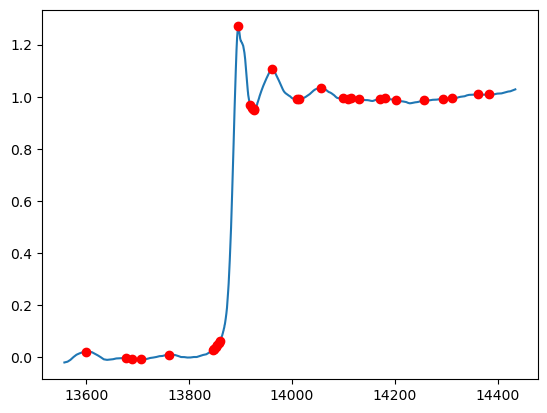

In [35]:
###はじめに、scipy(特別な操作は何もなし)を使ってピークの数を検出する###

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# ピークの検出
peaks, _ = find_peaks(y)

# ピークの数と位置の表示
num_peaks = len(peaks)
peak_positions = [x[i] for i in peaks]
print("ピークの数:", num_peaks)
print("ピークの位置:", peak_positions)

# ピークの位置をグラフにプロット
plt.plot(data.energy, data.mu)
plt.plot(peak_positions, [y[i] for i in peaks], 'ro')
plt.show()

ピークの数: 6
ピークの位置: [13895.625787, 13961.230422, 14055.438564, 14114.093622, 14180.997132, 14361.054297]


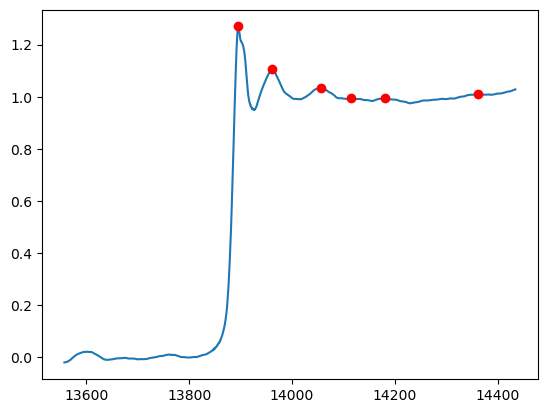

In [58]:
###次に、上に凸である(極大値を持つ)ピークの数を調べる###

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# ピークの検出
peaks, _ = find_peaks(y)

# 上に凸のピークのみを抽出
convex_peaks = []
for i in range(1, len(peaks)-1):
    if y[peaks[i]] > y[peaks[i-1]] and y[peaks[i]] > y[peaks[i+1]]:
        convex_peaks.append(peaks[i])

# ピークの数と位置の表示
num_peaks = len(convex_peaks)
peak_positions = [x[i] for i in convex_peaks]
print("ピークの数:", num_peaks)
print("ピークの位置:", peak_positions)

# ピークの位置をグラフにプロット
plt.plot(data.energy, data.mu)
plt.plot(peak_positions, [y[i] for i in convex_peaks], 'ro')
plt.show()

ピークの数: 6
ピークの位置: [13705.812352, 13926.046547, 14013.201684, 14108.699831, 14129.682951, 14256.985009]


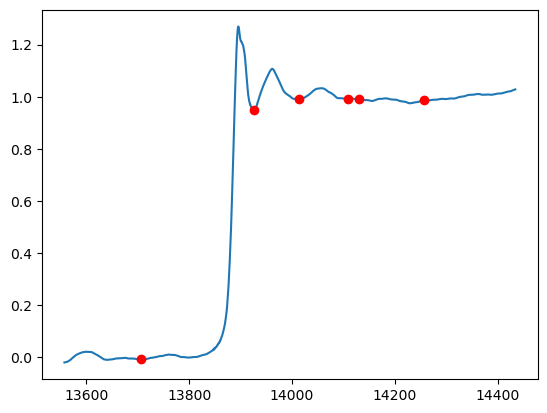

In [103]:
###次に、下に凸である(極小値を持つ)ピークの数を調べる###

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# ピークの検出
peaks, _ = find_peaks(y)

# 下に凸のピークのみを抽出
convex_peaks = []
for i in range(1, len(peaks)-1):
    if y[peaks[i]] < y[peaks[i-1]] and y[peaks[i]] < y[peaks[i+1]]:
        convex_peaks.append(peaks[i])

# ピークの数と位置の表示
num_peaks = len(convex_peaks)
peak_positions = [x[i] for i in convex_peaks]
print("ピークの数:", num_peaks)
print("ピークの位置:", peak_positions)

# ピークの位置をグラフにプロット
plt.plot(data.energy, data.mu)
plt.plot(peak_positions, [y[i] for i in convex_peaks], 'ro')
plt.show()

ピークの数: 12
ピークの位置: [13705.812352, 13895.625787, 13926.046547, 13961.230422, 14013.201684, 14055.438564, 14108.699831, 14114.093622, 14129.682951, 14180.997132, 14256.985009, 14361.054297]


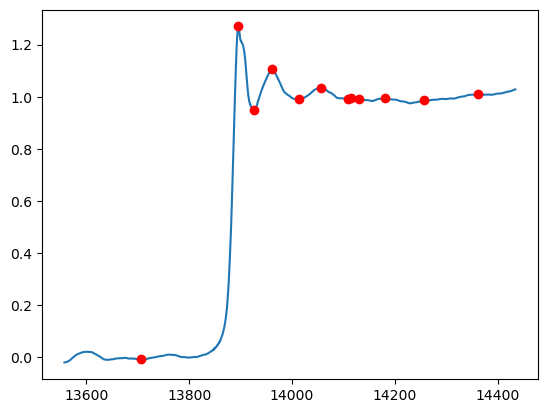

In [61]:
###次に、上に凸・下に凸である(極大値または極小値を持つ)ピークの数を調べる###
###つまり、前の2つを合わせたものである###

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# ピークの検出
peaks, _ = find_peaks(y)

# 上に凸・下に凸のピークのみを抽出
convex_peaks = []
for i in range(1, len(peaks)-1):
    if (y[peaks[i]] > y[peaks[i-1]] and y[peaks[i]] > y[peaks[i+1]]) or (y[peaks[i]] < y[peaks[i-1]] and y[peaks[i]] < y[peaks[i+1]]):
        convex_peaks.append(peaks[i])

# ピークの数と位置の表示
num_peaks = len(convex_peaks)
peak_positions = [x[i] for i in convex_peaks]
print("ピークの数:", num_peaks)
print("ピークの位置:", peak_positions)

# ピークの位置をグラフにプロット
plt.plot(data.energy, data.mu)
plt.plot(peak_positions, [y[i] for i in convex_peaks], 'ro')
plt.show()

ピークの数: 8
ピークの位置: [13705.812352, 13895.625787, 13926.046547, 13961.230422, 14013.201684, 14055.438564, 14108.699831, 14361.054297]


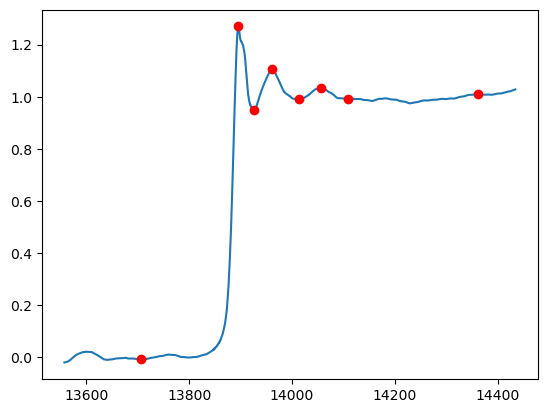

In [105]:
###次に、上に凸・下に凸である(極大値または極小値を持つ)ピークの数を調べる###
###ただし、隣り合うピークの差が0.02以上のもののみ###
###まだ余計なピークも検出されている###

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# ピークの検出
peaks, _ = find_peaks(y)

# 上に凸・下に凸のピークのみを抽出
convex_peaks = []
for i in range(1, len(peaks)-1):
    if (y[peaks[i]] > y[peaks[i-1]] and y[peaks[i]] > y[peaks[i+1]]) or (y[peaks[i]] < y[peaks[i-1]] and y[peaks[i]] < y[peaks[i+1]]):
        convex_peaks.append(peaks[i])

# 隣り合うピークのy座標の差が0.02以上となるピークのみを抽出
filtered_peaks = [convex_peaks[0]]  # 最初のピークを追加
for i in range(1, len(convex_peaks)):
    if abs(y[convex_peaks[i]] - y[convex_peaks[i-1]]) >= 0.02:
        filtered_peaks.append(convex_peaks[i])

# ピークの数と位置の表示
num_peaks = len(filtered_peaks)
peak_positions = [x[i] for i in filtered_peaks]
print("ピークの数:", num_peaks)
print("ピークの位置:", peak_positions)

# ピークの位置をグラフにプロット
plt.plot(x, y)
plt.plot(peak_positions, [y[i] for i in filtered_peaks], 'ro')
plt.show()


ピークの数: 5
ピークの位置: [13705.812352, 13895.625787, 13926.046547, 13961.230422, 14013.201684]


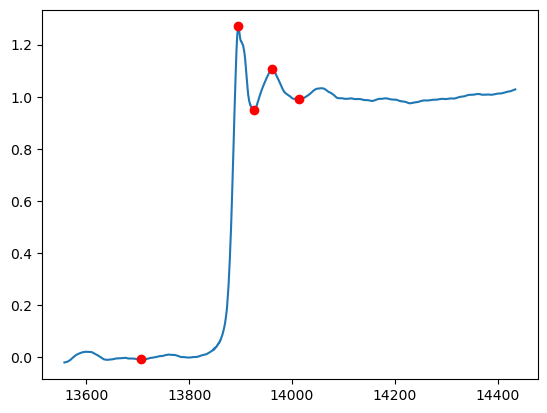

In [110]:
###次に、上に凸・下に凸である(極大値または極小値を持つ)ピークの数を調べる###
###ただし、隣り合うピークの差が0.05以上のもののみ###
###まだ余計なピークも検出されている###

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# ピークの検出
peaks, _ = find_peaks(y)

# 上に凸・下に凸のピークのみを抽出
convex_peaks = []
for i in range(1, len(peaks)-1):
    if (y[peaks[i]] > y[peaks[i-1]] and y[peaks[i]] > y[peaks[i+1]]) or (y[peaks[i]] < y[peaks[i-1]] and y[peaks[i]] < y[peaks[i+1]]):
        convex_peaks.append(peaks[i])

# 隣り合うピークのy座標の差が0.02以上となるピークのみを抽出
filtered_peaks = [convex_peaks[0]]  # 最初のピークを追加
for i in range(1, len(convex_peaks)):
    if abs(y[convex_peaks[i]] - y[convex_peaks[i-1]]) >= 0.05:
        filtered_peaks.append(convex_peaks[i])

# ピークの数と位置の表示
num_peaks = len(filtered_peaks)
peak_positions = [x[i] for i in filtered_peaks]
print("ピークの数:", num_peaks)
print("ピークの位置:", peak_positions)

# ピークの位置をグラフにプロット
plt.plot(x, y)
plt.plot(peak_positions, [y[i] for i in filtered_peaks], 'ro')
plt.show()


ピークの数: 3
ピークの位置: [13895.625787, 13961.230422, 14055.438564]


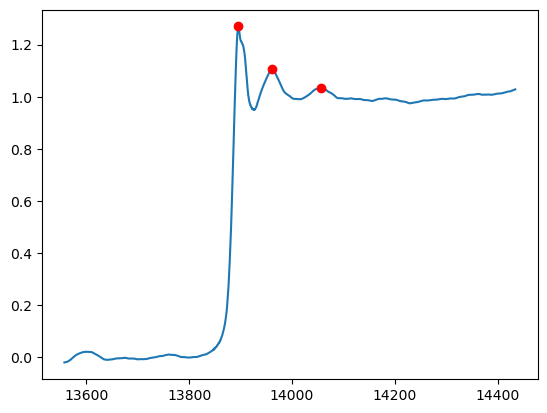

In [73]:
###次に、上に凸だけピークの数を調べる###
###ただし、隣り合うピークの差が0.05以上のもののみ###
###まだ余計なピークも検出されている###
###これだと、極大値ピークの差が0.05という意味で、正しくない###

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# ピークの検出
peaks, _ = find_peaks(y)

# 上に凸のピークのみを抽出
convex_peaks = []
for i in range(1, len(peaks)-1):
    if (y[peaks[i]] > y[peaks[i-1]] and y[peaks[i]] > y[peaks[i+1]]):
        convex_peaks.append(peaks[i])

# 隣り合うピークのy座標の差が0.05以上となるピークのみを抽出
filtered_peaks = [convex_peaks[0]]  # 最初のピークを追加
for i in range(1, len(convex_peaks)):
    if abs(y[convex_peaks[i]] - y[convex_peaks[i-1]]) >= 0.05:
        filtered_peaks.append(convex_peaks[i])

# ピークの数と位置の表示
num_peaks = len(filtered_peaks)
peak_positions = [x[i] for i in filtered_peaks]
print("ピークの数:", num_peaks)
print("ピークの位置:", peak_positions)

# ピークの位置をグラフにプロット
plt.plot(x, y)
plt.plot(peak_positions, [y[i] for i in filtered_peaks], 'ro')
plt.show()


ピークの数: 6
ピークの位置: [13705.812352, 13895.625787, 13926.046547, 13961.230422, 14013.201684, 14055.438564]


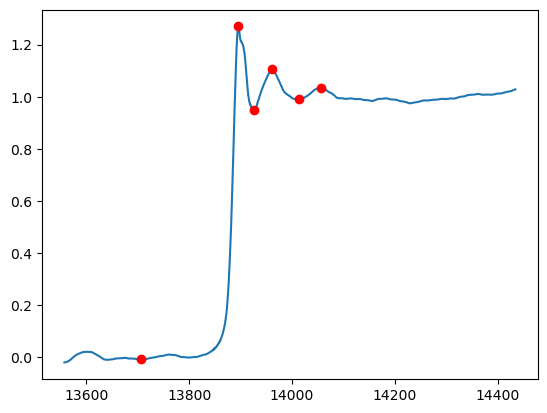

In [111]:
###次に、上に凸・下に凸である(極大値または極小値を持つ)ピークの数を調べる###
###ただし、隣り合うピークの差が0.04以上のもののみ###
###まだ余計なピークも検出されている###

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# ピークの検出
peaks, _ = find_peaks(y)

# 上に凸・下に凸のピークのみを抽出
convex_peaks = []
for i in range(1, len(peaks)-1):
    if (y[peaks[i]] > y[peaks[i-1]] and y[peaks[i]] > y[peaks[i+1]]) or (y[peaks[i]] < y[peaks[i-1]] and y[peaks[i]] < y[peaks[i+1]]):
        convex_peaks.append(peaks[i])

# 隣り合うピークのy座標の差が0.04以上となるピークのみを抽出
filtered_peaks = [convex_peaks[0]]  # 最初のピークを追加
for i in range(1, len(convex_peaks)):
    if abs(y[convex_peaks[i]] - y[convex_peaks[i-1]]) >= 0.04:
        filtered_peaks.append(convex_peaks[i])

# ピークの数と位置の表示
num_peaks = len(filtered_peaks)
peak_positions = [x[i] for i in filtered_peaks]
print("ピークの数:", num_peaks)
print("ピークの位置:", peak_positions)

# ピークの位置をグラフにプロット
plt.plot(x, y)
plt.plot(peak_positions, [y[i] for i in filtered_peaks], 'ro')
plt.show()


[190, 318, 361]
ピークの数: 6
ピークの位置: [13895.625787, 13926.046547, 13961.230422, 14013.201684, 14055.438564]
ピークの位置y: [1.2698594576435789, 0.9500586427130093, 1.1073385447830073, 0.9907720542113774, 1.032685698381114]
[-0.31980081493056955, 0.15727990206999798, -0.11656649057162993, 0.04191364416973653]
[0.15727990206999798, 0.04191364416973653]
ピークの真の数： 2


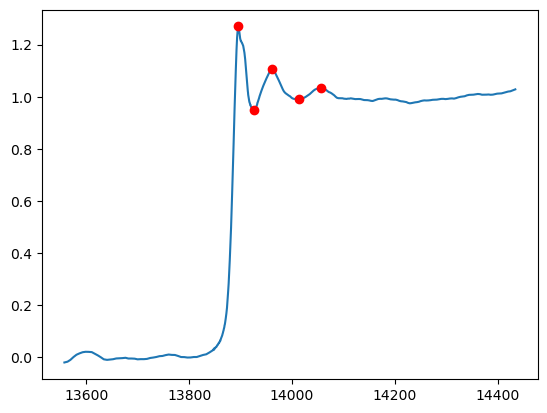

In [132]:
###試行錯誤ver.###

###次に、上に凸・下に凸である(極大値または極小値を持つ)ピークの数を調べる###
###ただし、隣り合うピークの差が0.04以上のもののみ###
###まだ余計なピークも検出されている###

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# ピークの検出
peaks, _ = find_peaks(y)

# 上に凸・下に凸のピークのみを抽出
convex_peaks = []
for i in range(1, len(peaks)-1):
    if (y[peaks[i]] > y[peaks[i-1]] and y[peaks[i]] > y[peaks[i+1]]) or (y[peaks[i]] < y[peaks[i-1]] and y[peaks[i]] < y[peaks[i+1]]):
        convex_peaks.append(peaks[i])
        
# 上に凸のピークのみを抽出
convex_peaks_upper = []
for i in range(1, len(peaks)-1):
    if y[peaks[i]] > y[peaks[i-1]] and y[peaks[i]] > y[peaks[i+1]]:
        convex_peaks_upper.append(peaks[i])

# 隣り合うピークのy座標の差が0.04以上となるピークのみを抽出
filtered_peaks = [convex_peaks[0]]  # 最初のピークを追加
for i in range(1, len(convex_peaks)):
    if abs(y[convex_peaks[i]] - y[convex_peaks[i-1]]) >= 0.04:
        filtered_peaks.append(convex_peaks[i])
        
common_peaks = [peak for peak in convex_peaks_upper if peak in filtered_peaks]

print(common_peaks)

# ピークの数と位置の表示
# ただし、μが0.5超のもの(つまり、吸収端よりも右側領域)のみとする
num_peaks = len(filtered_peaks)
peak_positions = [x[i] for i in filtered_peaks if y[i] > 0.5]
peak_positions_y = [y[i] for i in filtered_peaks if y[i] > 0.5]
common_peak_positions = [x[i] for i in common_peaks if y[i] > 0.5]

differences = [peak_positions_y[i+1] - peak_positions_y[i] for i in range(len(peak_positions_y)-1)]
filtered_differences = [diff for diff in differences if 0 < diff < 1]

print("ピークの数:", num_peaks)
print("ピークの位置:", peak_positions)
print("ピークの位置y:", peak_positions_y)
print(differences)
print(filtered_differences)
print("ピークの真の数：", len(filtered_differences))

# ピークの位置をグラフにプロット
plt.plot(x, y)
plt.plot(peak_positions, [y[i] for i in filtered_peaks if y[i] > 0.5], 'ro')
plt.show()


小ピークの位置x: [13895.625787, 13926.046547, 13961.230422, 14013.201684, 14055.438564]
小ピークの位置y: [1.2698594576435789, 0.9500586427130093, 1.1073385447830073, 0.9907720542113774, 1.032685698381114]
小ピークの差異x: [30.420759999999063, 35.183875000000626, 51.971261999999115, 42.23688000000038]
小ピークの差異y: [-0.31980081493056955, 0.15727990206999798, -0.11656649057162993, 0.04191364416973653]
小ピークの幅: [35.183875000000626, 42.23688000000038]
小ピークの高さ: [0.15727990206999798, 0.04191364416973653]
小ピークの数: 2


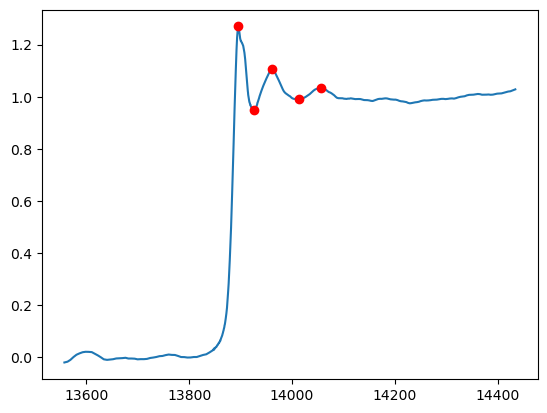

In [141]:
###次に、上に凸・下に凸である(極大値または極小値を持つ)ピークの数を調べる###
###ただし、隣り合うピークの差が0.04以上のもののみ###

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# ピークの検出
peaks, _ = find_peaks(y)

# 上に凸・下に凸のピークのみを抽出
convex_peaks = []
for i in range(1, len(peaks)-1):
    if (y[peaks[i]] > y[peaks[i-1]] and y[peaks[i]] > y[peaks[i+1]]) or (y[peaks[i]] < y[peaks[i-1]] and y[peaks[i]] < y[peaks[i+1]]):
        convex_peaks.append(peaks[i])
        
# 上に凸のピークのみを抽出
convex_peaks_upper = []
for i in range(1, len(peaks)-1):
    if y[peaks[i]] > y[peaks[i-1]] and y[peaks[i]] > y[peaks[i+1]]:
        convex_peaks_upper.append(peaks[i])

# 隣り合うピークのy座標の差が0.04以上となるピークのみを抽出
filtered_peaks = [convex_peaks[0]]  # 最初のピークを追加
for i in range(1, len(convex_peaks)):
    if abs(y[convex_peaks[i]] - y[convex_peaks[i-1]]) >= 0.04:
        filtered_peaks.append(convex_peaks[i])

## ピークの数と位置の表示
## ただし、μが0.5超のもの(つまり、吸収端よりも右側領域)のみとする

#ピークの位置(Energy)
peak_positions = [x[i] for i in filtered_peaks if y[i] > 0.5]

#ピークの位置(μt)
peak_positions_y = [y[i] for i in filtered_peaks if y[i] > 0.5]

#ピークの差異(Energy)(減少も含む)
differences = [peak_positions[i+1] - peak_positions[i] for i in range(len(peak_positions)-1)]

#ピークの差異(μt)(減少も含む)
differences_y = [peak_positions_y[i+1] - peak_positions_y[i] for i in range(len(peak_positions_y)-1)]

#ピークの幅
filtered_differences = [differences[i] for i in range(len(differences)) if 0 < differences_y[i] < 1]

#ピークの高さ(=ピークの差異の増加のみ)
filtered_differences_y = [diff for diff in differences_y if 0 < diff < 1]

#ピークの個数は、len(filtered_differences)と表せる。

print("小ピークの位置x:", peak_positions)
print("小ピークの位置y:", peak_positions_y)
print("小ピークの差異x:", differences)
print("小ピークの差異y:", differences_y)
print("小ピークの幅:", filtered_differences)
print("小ピークの高さ:", filtered_differences_y)
print("小ピークの数:", len(filtered_differences_y))

# ピークの位置をグラフにプロット
plt.plot(x, y)
plt.plot(peak_positions, peak_positions_y, 'ro')
plt.show()

小ピークの位置x: [13895.625787, 13926.046547, 13961.230422, 14013.201684, 14055.438564]
小ピークの位置y: [1.2698594576435789, 0.9500586427130093, 1.1073385447830073, 0.9907720542113774, 1.032685698381114]
小ピークの差異x: [30.420759999999063, 35.183875000000626, 51.971261999999115, 42.23688000000038]
小ピークの差異y: [-0.31980081493056955, 0.15727990206999798, -0.11656649057162993, 0.04191364416973653]
小ピークの幅: [35.183875000000626, 42.23688000000038]
小ピークの高さ: [0.15727990206999798, 0.04191364416973653]
小ピークの傾き [0.004470226831751624, 0.0009923470713209912]
小ピークの数: 2


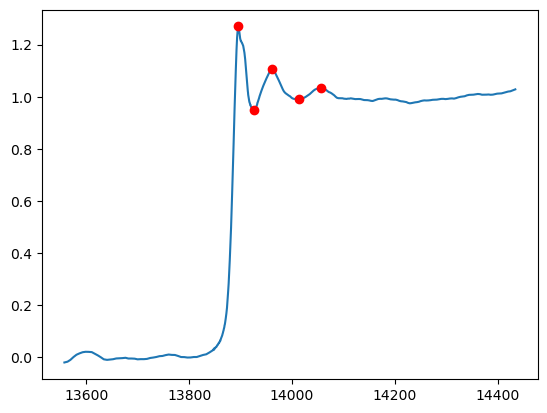

In [142]:
###次に、上に凸・下に凸である(極大値または極小値を持つ)ピークの数を調べる###
###ただし、隣り合うピークの差が0.04以上のもののみ###

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# ピークの検出
peaks, _ = find_peaks(y)

# 上に凸・下に凸のピークのみを抽出
convex_peaks = []
for i in range(1, len(peaks)-1):
    if (y[peaks[i]] > y[peaks[i-1]] and y[peaks[i]] > y[peaks[i+1]]) or (y[peaks[i]] < y[peaks[i-1]] and y[peaks[i]] < y[peaks[i+1]]):
        convex_peaks.append(peaks[i])

# 隣り合うピークのy座標の差が0.04以上となるピークのみを抽出
filtered_peaks = [convex_peaks[0]]  # 最初のピークを追加
for i in range(1, len(convex_peaks)):
    if abs(y[convex_peaks[i]] - y[convex_peaks[i-1]]) >= 0.04:
        filtered_peaks.append(convex_peaks[i])

## ピークの数と位置の表示
## ただし、μが0.5超のもの(つまり、吸収端よりも右側領域)のみとする

#ピークの位置(Energy)
peak_positions = [x[i] for i in filtered_peaks if y[i] > 0.5]

#ピークの位置(μt)
peak_positions_y = [y[i] for i in filtered_peaks if y[i] > 0.5]

#ピークの差異(Energy)(減少も含む)
differences = [peak_positions[i+1] - peak_positions[i] for i in range(len(peak_positions)-1)]

#ピークの差異(μt)(減少も含む)
differences_y = [peak_positions_y[i+1] - peak_positions_y[i] for i in range(len(peak_positions_y)-1)]

#ピークの幅
filtered_differences = [differences[i] for i in range(len(differences)) if 0 < differences_y[i] < 1]

#ピークの高さ(=ピークの差異の増加のみ)
filtered_differences_y = [diff for diff in differences_y if 0 < diff < 1]

#ピークの傾き
small_peak_slope = [filtered_differences_y[i] / filtered_differences[i] for i in range(len(filtered_differences_y))]

#ピークの個数は、len(filtered_differences)と表せる。

print("小ピークの位置x:", peak_positions)
print("小ピークの位置y:", peak_positions_y)
print("小ピークの差異x:", differences)
print("小ピークの差異y:", differences_y)
print("小ピークの幅:", filtered_differences)
print("小ピークの高さ:", filtered_differences_y)
print("小ピークの傾き", small_peak_slope)
print("小ピークの数:", len(filtered_differences_y))

# ピークの位置をグラフにプロット
plt.plot(x, y)
plt.plot(peak_positions, peak_positions_y, 'ro')
plt.show()

ピークの数: 6
ピークの位置: [13895.625787, 13961.230422, 14055.438564, 14114.093622, 14180.997132, 14361.054297]


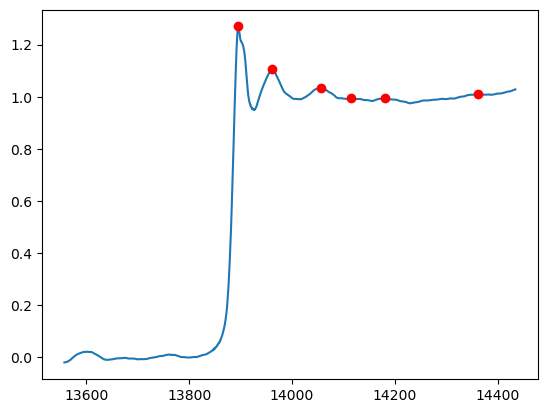

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# ピークの検出
peaks, _ = find_peaks(y)

# 上に凸のピークのみを抽出
convex_peaks = []
for i in range(1, len(peaks)-1):
    if y[peaks[i]] > y[peaks[i-1]] and y[peaks[i]] > y[peaks[i+1]]:
        convex_peaks.append(peaks[i])

peaks = convex_peaks

# ピークの数と位置の表示
num_peaks = len(peaks)
peak_positions = [x[i] for i in peaks]
print("ピークの数:", num_peaks)
print("ピークの位置:", peak_positions)

# ピークの位置をグラフにプロット
plt.plot(data.energy, data.mu)
plt.plot(peak_positions, [y[i] for i in peaks], 'ro')
plt.show()

ピークの数: 6
ピークの位置: [13895.625787, 13961.230422, 14055.438564, 14114.093622, 14180.997132, 14361.054297]


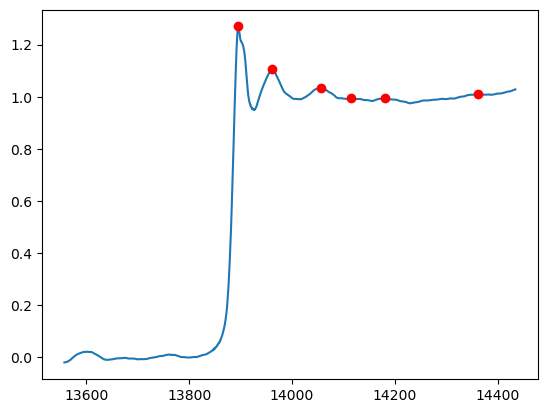

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# ピークの検出
peaks, _ = find_peaks(y, prominence=0.000001)

# 上に凸のピークのみを抽出
convex_peaks = []
for i in range(1, len(peaks)-1):
    if y[peaks[i]] > y[peaks[i-1]] and y[peaks[i]] > y[peaks[i+1]]:
        convex_peaks.append(peaks[i])

peaks = convex_peaks

# ピークの数と位置の表示
num_peaks = len(peaks)
peak_positions = [x[i] for i in peaks]
print("ピークの数:", num_peaks)
print("ピークの位置:", peak_positions)

# ピークの位置をグラフにプロット
plt.plot(data.energy, data.mu)
plt.plot(peak_positions, [y[i] for i in peaks], 'ro')
plt.show()

ピークの数: 6
ピークの位置: [13895.625787, 13961.230422, 14055.438564, 14114.093622, 14180.997132, 14361.054297]


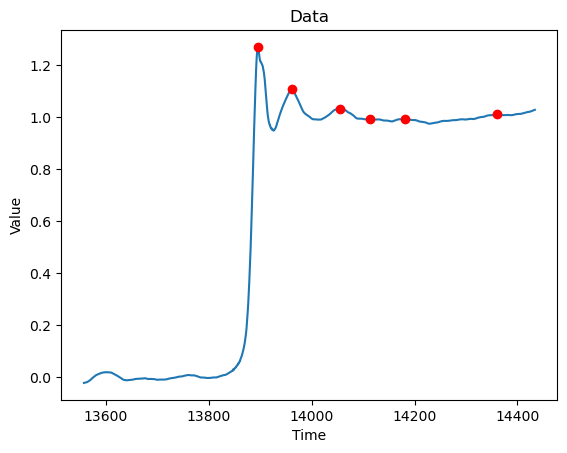

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_prominences


# グラフのプロット
plt.plot(x, y)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Data')

# ピークの検出
peaks, _ = find_peaks(y)

# 上に凸のピークのみを抽出
convex_peaks = []
for i in range(1, len(peaks)-1):
    if y[peaks[i]] > y[peaks[i-1]] and y[peaks[i]] > y[peaks[i+1]]:
        convex_peaks.append(peaks[i])

# ピークの数と位置の表示
num_peaks = len(convex_peaks)
peak_positions = [x[i] for i in convex_peaks]
print("ピークの数:", num_peaks)
print("ピークの位置:", peak_positions)

# ピークの位置をグラフにプロット
plt.plot(peak_positions, [y[i] for i in convex_peaks], 'ro')
plt.show()

ピークの数: 0
ピークの位置: []


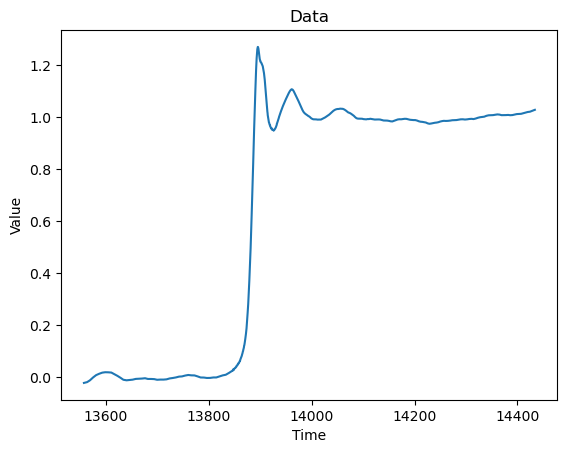

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_prominences


# グラフのプロット
plt.plot(x, y)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Data')

#ピークの検出
peaks, _ = find_peaks(y)
prominences = peak_prominences(y, peaks)[0]

# 極小値から極大値までの高さが0.5以上のピークのみを抽出
filtered_peaks = []
for i, peak in enumerate(peaks):
    if prominences[i] > 0.5:
        filtered_peaks.append(peak)

# ピークの数と位置の表示
num_peaks = len(filtered_peaks)
peak_positions = [x[i] for i in filtered_peaks]
print("ピークの数:", num_peaks)
print("ピークの位置:", peak_positions)

# ピークの位置をグラフにプロット
plt.plot(peak_positions, [y[i] for i in filtered_peaks], 'ro')
plt.show()

# 参考文献

In [5]:
# https://www.apch.kindai.ac.jp/laboratory/asakura/personal/ja/others/dtj/athena.html
# https://staff.aist.go.jp/a.ohta/japanese/study/XAFS_ex2.htm